# **Classification:** Logistic Regression (**Gradient Descent on Sigmoid**)

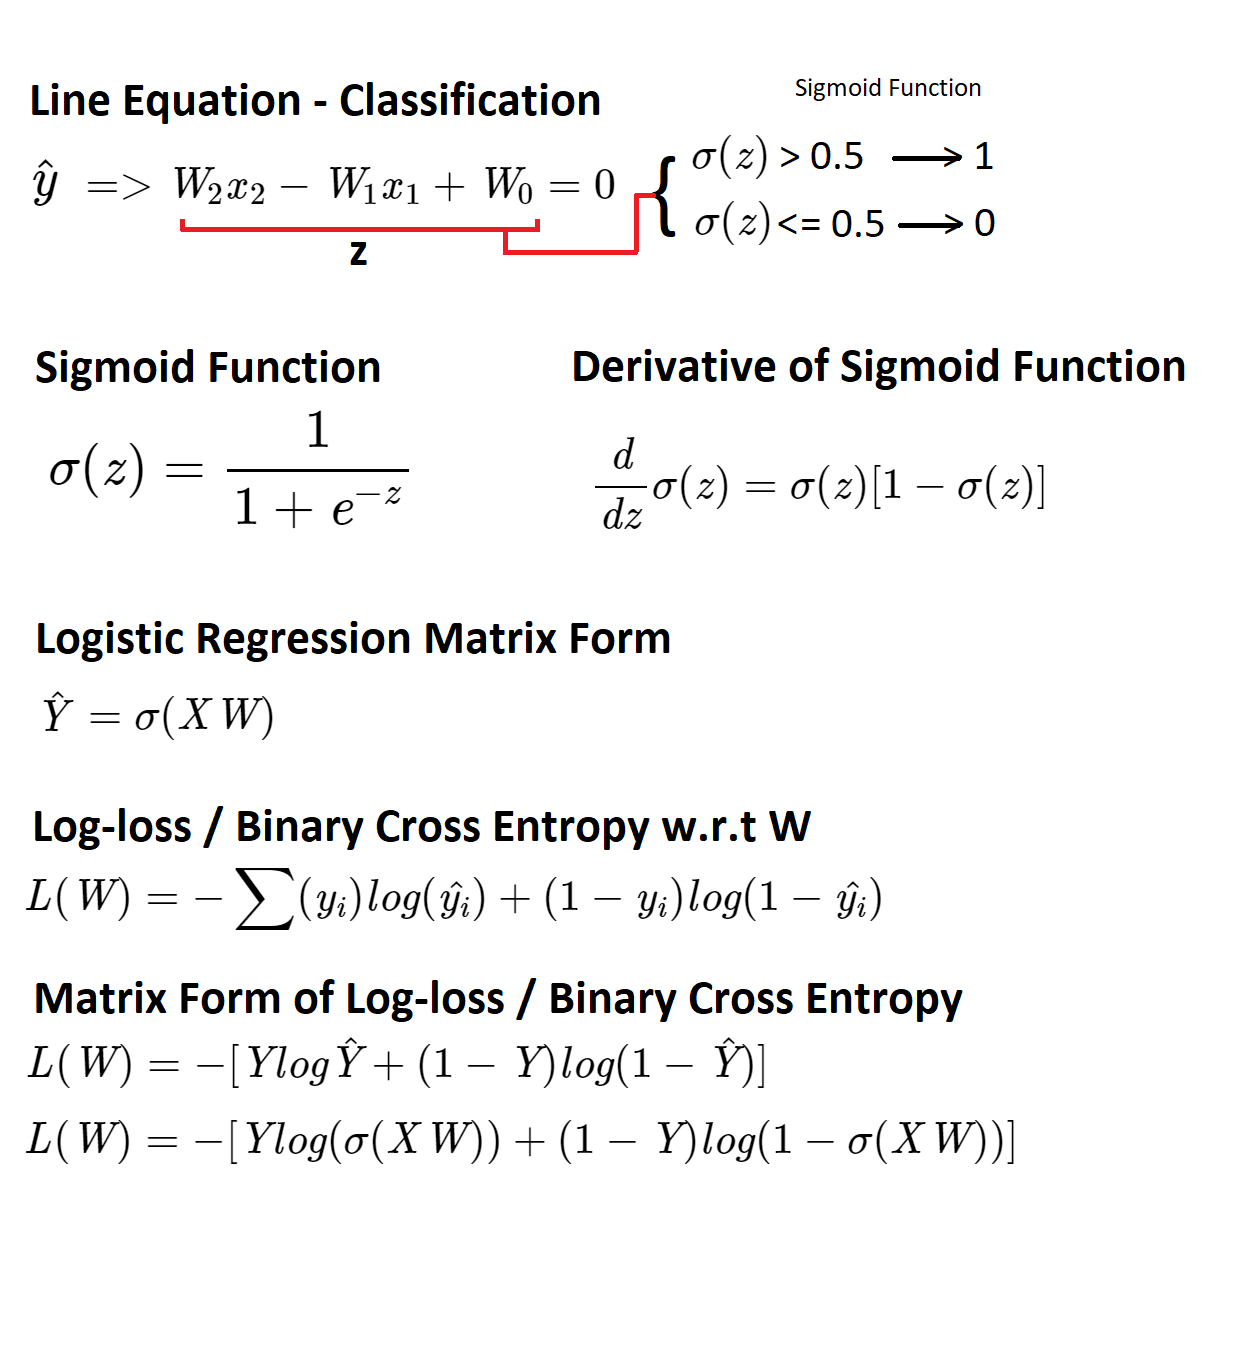

In [2]:
from IPython.display import Image
Image(filename="Matrix of Logistic Regression and Loss.png")

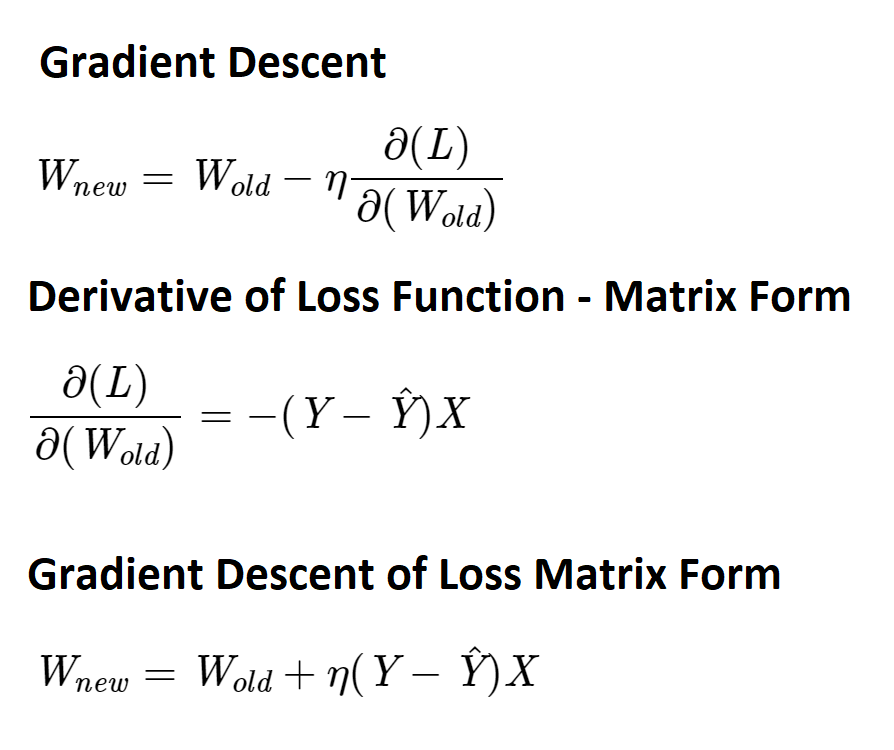

In [3]:
Image(filename="Matrix Gradient Descent of Loss.png")

In [4]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

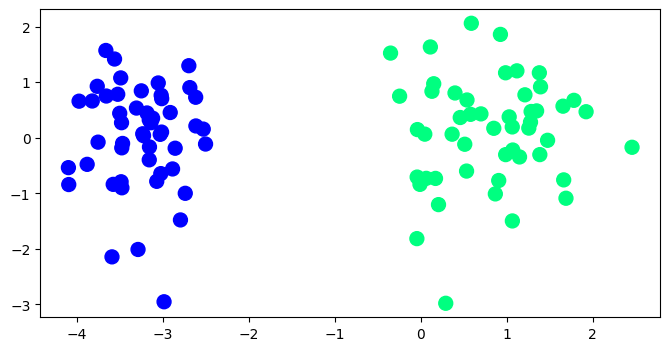

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

## **Logistic Regression:** Scikit-Learn

In [28]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

print(lor.coef_)
print(lor.intercept_)

m_log = -(lor.coef_[0][0]/lor.coef_[0][1])
b_log = -(lor.intercept_/lor.coef_[0][1])

x_input_log = np.linspace(-3,3,100)
y_input_log = m_log*x_input_log + b_log

[[4.87922606 0.23272764]]
[5.83281721]


c:\Users\HAIER\miniconda3\envs\latest_python\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## **Logistic Regression:** Scratch (GD with Sigmoid)

In [29]:
def GDlog(X,y):

    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(3000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[0],weights[1:]


intercept_,coef_ = GDlog(X,y)

m_GD= -(coef_[0]/coef_[1])
b_GD = -(intercept_/coef_[1])

print(m_GD, b_GD)

x_input_GD= np.linspace(-3,3,100)
y_input_GD = m_GD*x_input_GD + b_GD

-24.672169858556128 -29.287752988828164


(-3.0, 2.0)

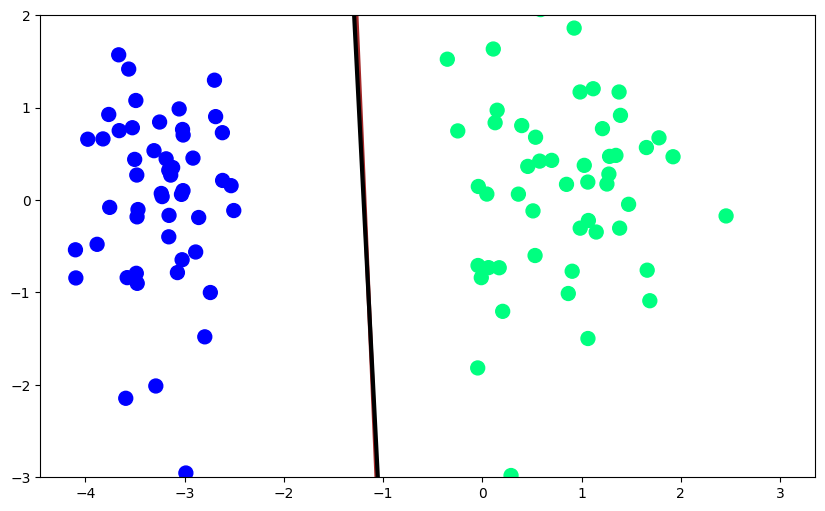

In [30]:
plt.figure(figsize=(10,6))
plt.plot(x_input_GD,y_input_GD,color='brown',linewidth=3)
plt.plot(x_input_log,y_input_log,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)